In [1]:
import pandas as pd
import numpy as np

### 카드 데이터

In [23]:
path = '../data/pkls/cardpkl/'

groupeddata = pd.read_pickle( path + 'groupeddata.pkl').reset_index()
dailyjong = pd.read_pickle( path + 'dailyjong.pkl').reset_index()
dailynowon = pd.read_pickle( path + 'dailyjong.pkl').reset_index()
groupeddata.tail()

,GU_CD,DONG_CD,SEX_CD,AGE_CD,MCT_CAT_CD,STD_DD,USE_AMT,USE_CNT,AMTperCNT
1859865,종로구,혜화동,M,65,의복,2019-03-07,136,5,27.2
1859866,종로구,혜화동,M,65,의복,2019-03-12,54,5,10.8
1859867,종로구,혜화동,M,65,의복,2019-03-16,163,5,32.6
1859868,종로구,혜화동,M,65,의복,2019-03-21,168,5,33.6
1859869,종로구,혜화동,M,65,의복,2019-03-23,661,5,132.2


In [24]:
set(groupeddata.reset_index().MCT_CAT_CD.values)

{'가전',
 '레저업소',
 '레저용품',
 '문화취미',
 '보건위생',
 '서적문구',
 '숙박',
 '연료판매',
 '요식업소',
 '유통업',
 '음료식품',
 '의료기관',
 '의복'}

In [88]:
cols = groupeddata.columns
cols = ['STD_DD', 'GU_CD', 'DONG_CD', 'SEX_CD', 'AGE_CD', 'MCT_CAT_CD',
       'USE_CNT', 'USE_AMT', 'AMTperCNT']
carddata = groupeddata[cols]
carddata['AGE_CD'] = data['AGE_CD'].astype('category')
carddata.tail()

,STD_DD,GU_CD,DONG_CD,SEX_CD,AGE_CD,MCT_CAT_CD,USE_CNT,USE_AMT,AMTperCNT
1859865,2019-03-07,종로구,혜화동,M,65,의복,5,136,27.2
1859866,2019-03-12,종로구,혜화동,M,65,의복,5,54,10.8
1859867,2019-03-16,종로구,혜화동,M,65,의복,5,163,32.6
1859868,2019-03-21,종로구,혜화동,M,65,의복,5,168,33.6
1859869,2019-03-23,종로구,혜화동,M,65,의복,5,661,132.2


In [89]:
carddata.iloc[:, -7:].head()

,DONG_CD,SEX_CD,AGE_CD,MCT_CAT_CD,USE_CNT,USE_AMT,AMTperCNT
0,공릉1동,F,20,가전,4,112,28.000000
1,공릉1동,F,20,가전,4,298,74.500000
2,공릉1동,F,20,가전,4,88,22.000000
3,공릉1동,F,20,가전,4,136,34.000000
4,공릉1동,F,20,가전,9,258,28.666667


### 미세먼지 데이터

In [120]:
path = '../data/pkls/'
final_nowon = pd.read_pickle( path + 'final_nowon.pickle')
final_jongro = pd.read_pickle( path + 'final_jongro.pickle')

In [134]:
jong_totalmean = pd.read_pickle( path + 'jong_totalmean.pkl')
nowon_totalmean = pd.read_pickle( path + 'nowon_totalmean.pkl')

In [150]:
data = carddata.copy()
data = data.set_index('STD_DD')
data.loc[data['GU_CD'] == '노원구', 'pm_class_today'] = nowon_totalmean['pm_class']
data.loc[data['GU_CD'] == '종로구', 'pm_class_today'] = jong_totalmean['pm_class']
data.loc[data['GU_CD'] == '노원구', 'pm_class_yesterday'] = nowon_totalmean['pm_class'].shift(1)
data.loc[data['GU_CD'] == '종로구', 'pm_class_yesterday'] = jong_totalmean['pm_class']
# data

### 유동인구 데이터

In [22]:
path = '../data/pkls/'
sex_age_move = pd.read_pickle( path + 'sex_age_move.pkl')
timemove = pd.read_pickle( path + 'timemove.pkl')

In [23]:
timemove['time_fp_sum'] = timemove.iloc[:, 2:].sum(axis=1)
timemove['time_fp_mean'] = timemove.iloc[:, 2:].mean(axis=1)

In [24]:
timemove = timemove.set_index('STD_YMD', 'HDONG_NM')
sex_age_move = sex_age_move.set_index('STD_YMD', 'HDONG_NM')
del sex_age_move['STD_YM']
del sex_age_move['HDONG_CD']
sex_age_move.head()

,HDONG_NM,MAN_FLOW_POP_CNT_00,MAN_FLOW_POP_CNT_10,MAN_FLOW_POP_CNT_20,MAN_FLOW_POP_CNT_30,MAN_FLOW_POP_CNT_40,MAN_FLOW_POP_CNT_50,MAN_FLOW_POP_CNT_60,MAN_FLOW_POP_CNT_70U,WMAN_FLOW_POP_CNT_00,WMAN_FLOW_POP_CNT_10,WMAN_FLOW_POP_CNT_20,WMAN_FLOW_POP_CNT_30,WMAN_FLOW_POP_CNT_40,WMAN_FLOW_POP_CNT_50,WMAN_FLOW_POP_CNT_60,WMAN_FLOW_POP_CNT_70U,SUM,MEAN
STD_YMD,,,,,,,,,,,,,,,,,,,
20180401,청운효자동,78.98,1045.92,2776.54,3996.64,4157.91,4472.73,3165.08,1165.64,142.94,1158.75,2476.23,2954.22,3263.74,3044.53,1762.01,811.56,36473.42,2279.588750
20180401,사직동,263.79,3385.10,10964.61,13660.64,13327.45,14250.07,11365.74,4743.49,395.09,3946.88,12407.47,11561.01,11533.92,9825.04,6368.29,2972.08,130970.67,8185.666875
20180401,삼청동,78.07,586.33,1919.18,2820.54,2895.42,2763.17,2080.07,845.55,91.00,745.18,2363.92,2417.99,2344.41,1829.37,1103.63,421.64,25305.47,1581.591875
20180401,부암동,228.50,1734.85,4347.77,7678.93,8770.41,9448.60,6329.92,2366.21,252.55,1995.96,3944.20,5459.47,6476.51,5860.77,3342.20,1498.65,69735.50,4358.468750
20180401,평창동,354.38,3463.71,7520.31,12716.30,15683.12,19367.23,14064.57,5432.39,434.74,4115.72,6864.67,10259.92,12601.96,13785.77,7965.76,3820.41,138450.96,8653.185000


In [61]:
floating_pop = pd.merge(timemove, sex_age_move, on=['STD_YMD', 'HDONG_NM'])

In [88]:
floating_pop = floating_pop.reset_index()
floating_pop['STD_YMD'] = pd.to_datetime(floating_pop['STD_YMD'], format='%Y%m%d', errors='ignore')
floating_pop = floating_pop.set_index('STD_YMD')

In [147]:
temp_w = floating_pop.iloc[:,-10:-2]
temp_m = floating_pop.iloc[:,-18:-10]
floating_pop

,HDONG_NM,TMST_05,TMST_06,TMST_07,TMST_08,TMST_09,TMST_10,TMST_11,TMST_12,TMST_13,...,WMAN_FLOW_POP_CNT_00,WMAN_FLOW_POP_CNT_10,WMAN_FLOW_POP_CNT_20,WMAN_FLOW_POP_CNT_30,WMAN_FLOW_POP_CNT_40,WMAN_FLOW_POP_CNT_50,WMAN_FLOW_POP_CNT_60,WMAN_FLOW_POP_CNT_70U,SUM,MEAN
STD_YMD,,,,,,,,,,,,,,,,,,,,,
2018-04-01,가회동,143.52,248.11,320.00,640.94,866.80,1092.78,1361.76,1585.97,1494.60,...,46.75,495.32,1450.81,1542.10,1565.77,1374.16,736.36,318.38,17509.60,1094.350000
2018-04-01,공릉1동,2327.95,3663.48,3864.96,5713.36,7013.81,8737.52,9302.84,9804.95,11344.93,...,441.89,5248.63,12697.40,13924.82,14543.23,14413.09,8607.90,3472.09,174414.81,10900.925625
2018-04-01,공릉2동,1756.39,2822.80,4504.96,5774.51,7616.00,9632.36,9509.23,11026.08,12229.50,...,549.89,6892.35,11172.55,11761.08,14742.59,12974.23,7379.55,2826.57,162061.26,10128.828750
2018-04-01,교남동,319.96,543.00,663.56,1140.63,1568.57,1905.76,1679.05,1982.61,2007.89,...,93.08,887.68,2150.88,2488.90,2485.89,2470.79,1517.34,659.94,28356.20,1772.262500
2018-04-01,무악동,195.80,298.89,342.80,618.95,1197.67,1269.95,1006.10,1120.90,1243.10,...,53.91,590.02,1374.07,1467.97,1662.93,1586.98,998.13,505.00,18185.99,1136.624375
2018-04-01,부암동,771.25,1031.59,1810.52,2557.06,3311.50,4508.32,4223.61,4491.89,5372.25,...,252.55,1995.96,3944.20,5459.47,6476.51,5860.77,3342.20,1498.65,69735.50,4358.468750
2018-04-01,사직동,1355.75,2473.61,3572.35,6145.07,7703.36,8742.41,9296.29,10060.52,10990.83,...,395.09,3946.88,12407.47,11561.01,11533.92,9825.04,6368.29,2972.08,130970.67,8185.666875
2018-04-01,삼청동,146.87,287.34,391.87,784.74,1437.12,1652.25,1985.75,2485.91,2640.20,...,91.00,745.18,2363.92,2417.99,2344.41,1829.37,1103.63,421.64,25305.47,1581.591875
2018-04-01,상계10동,427.44,603.09,693.96,1360.05,1852.12,2198.11,1943.54,2561.30,2764.10,...,93.70,1302.40,2516.44,3013.60,3410.82,3053.82,1785.45,638.19,37427.78,2339.236250


In [95]:
temp_m = temp_m.reset_index()
temp_w = temp_w.reset_index()

In [103]:
temp_m = temp_m.set_index('STD_YMD')

In [109]:
temp_m['male_sum'] = temp_m.sum(axis=1)
temp_m['male_mean'] = temp_m.mean(axis=1)
temp_w['female_sum'] = temp_w.sum(axis=1)
temp_w['female_mean'] = temp_w.mean(axis=1)

In [111]:
temp_w

,STD_YMD,HDONG_NM,WMAN_FLOW_POP_CNT_00,WMAN_FLOW_POP_CNT_10,WMAN_FLOW_POP_CNT_20,WMAN_FLOW_POP_CNT_30,WMAN_FLOW_POP_CNT_40,WMAN_FLOW_POP_CNT_50,WMAN_FLOW_POP_CNT_60,WMAN_FLOW_POP_CNT_70U,female_sum,female_mean
0,2018-04-01,가회동,46.75,495.32,1450.81,1542.10,1565.77,1374.16,736.36,318.38,7529.65,1673.255556
1,2018-04-01,공릉1동,441.89,5248.63,12697.40,13924.82,14543.23,14413.09,8607.90,3472.09,73349.05,16299.788889
2,2018-04-01,공릉2동,549.89,6892.35,11172.55,11761.08,14742.59,12974.23,7379.55,2826.57,68298.81,15177.513333
3,2018-04-01,교남동,93.08,887.68,2150.88,2488.90,2485.89,2470.79,1517.34,659.94,12754.50,2834.333333
4,2018-04-01,무악동,53.91,590.02,1374.07,1467.97,1662.93,1586.98,998.13,505.00,8239.01,1830.891111
5,2018-04-01,부암동,252.55,1995.96,3944.20,5459.47,6476.51,5860.77,3342.20,1498.65,28830.31,6406.735556
6,2018-04-01,사직동,395.09,3946.88,12407.47,11561.01,11533.92,9825.04,6368.29,2972.08,59009.78,13113.284444
7,2018-04-01,삼청동,91.00,745.18,2363.92,2417.99,2344.41,1829.37,1103.63,421.64,11317.14,2514.920000
8,2018-04-01,상계10동,93.70,1302.40,2516.44,3013.60,3410.82,3053.82,1785.45,638.19,15814.42,3514.315556
9,2018-04-01,상계1동,449.64,3550.57,6935.98,9964.98,11395.35,12686.49,7265.41,2667.87,54916.29,12203.620000


In [90]:
donglist = list(set(data.DONG_CD.values))
donglist

['종로5.6가동',
 '혜화동',
 '공릉1동',
 '교남동',
 '공릉2동',
 '부암동',
 '평창동',
 '월계3동',
 '상계6.7동',
 '월계2동',
 '중계본동',
 '상계10동',
 '월계1동',
 '상계5동',
 '창신2동',
 '삼청동',
 '상계3.4동',
 '상계8동',
 '중계1동',
 '숭인1동',
 '종로1.2.3.4가동',
 '상계9동',
 '상계1동',
 '창신3동',
 '하계2동',
 '하계1동',
 '상계2동',
 '중계4동',
 '창신1동',
 '사직동',
 '이화동',
 '청운효자동',
 '가회동',
 '숭인2동',
 '무악동',
 '중계2.3동']

In [92]:
for i in donglist:
    data.loc[data['DONG_CD'] == str(i), 'time_fp_sum'] = floating_pop.loc[floating_pop['HDONG_NM']== str(i)]['time_fp_sum']
    data.loc[data['DONG_CD'] == str(i), 'time_fp_mean'] = floating_pop.loc[floating_pop['HDONG_NM']== str(i)]['time_fp_mean']


In [ ]:
sex_age_fp_sum	sex_age_fp_mean

for i in donglist:
    if data.SEX_CD = 'F':
         data.loc[data['DONG_CD'] == str(i), 'sex_age_fp_sum'] = floating_pop.loc[floating_pop['HDONG_NM']== str(i)]['time_fp_sum']

In [129]:
# del data['time_fp_sum']
# del data['time_fp_mean']
# del data['sex_age_fp_sum']
# del data['sex_age_fp_mean']
data.groupby(['GU_CD', 'DONG_CD', 'STD_DD','time_fp_sum', 'time_fp_mean' ,'MCT_CAT_CD','pm_class_today','pm_class_yesterday']).sum()['USE_CNT'].unstack()

pm_class_yesterday                                                           0.0  \
GU_CD DONG_CD STD_DD     time_fp_sum time_fp_mean MCT_CAT_CD pm_class_today        
노원구   공릉1동    2018-04-02 201793.73   20179.373    가전         2.0             NaN   
                                                  레저업소       2.0             NaN   
                                                  레저용품       2.0             NaN   
                                                  문화취미       2.0             NaN   
                                                  보건위생       2.0             NaN   
                                                  서적문구       2.0             NaN   
                                                  숙박         2.0             NaN   
                                                  연료판매       2.0             NaN   
                                                  요식업소       2.0             NaN   
                                                  유통업        2.0             NaN   
                                                  음료식품       2.0             NaN   
                                                  의료기관       2.0             NaN   
                                                  의복         2.0             NaN   
              2018-04-03 205193.75   20519.375    가전         2.0             NaN   
                                                  레저업소       2.0             NaN   
                                                  레저용품       2.0             NaN   
                                                  문화취미       2.0             NaN   
                                                  보건위생       2.0             NaN   
                                                  서적문구       2.0             NaN   
                                                  숙박         2.0             NaN   
                                                  연료판매       2.0             NaN   
                                                  요식업소       2.0             NaN   
                                                  유통업        2.0             NaN   
                                                  음료식품       2.0             NaN   
                                                  의료기관       2.0             NaN   
                                                  의복         2.0             NaN   
              2018-04-04 204093.71   20409.371    가전         0.0             NaN   
                                                  레저업소       0.0             NaN   
                                                  레저용품       0.0             NaN   
                                                  문화취미       0.0             NaN   
...                                                                          ...   
종로구   혜화동     2019-03-29 94798.99    9479.899     연료판매       1.0             NaN   
                                                  요식업소       1.0             NaN   
                                                  유통업        1.0             NaN   
                                                  음료식품       1.0             NaN   
                                                  의료기관       1.0             NaN   
                                                  의복         1.0             NaN   
              2019-03-30 89748.96    8974.896     레저업소       1.0             NaN   
                                                  레저용품       1.0             NaN   
                                                  문화취미       1.0             NaN   
                                                  보건위생       1.0             NaN   
                                                  서적문구       1.0             NaN   
                                                  숙박         1.0             NaN   
                                                  연료판매       1.0             NaN   
                                                  요식업소       1.0             NaN   
                                                  유통

In [133]:
import matplotlib.pyplot as plt

In [136]:
from matplotlib import cm
color = cm.inferno_r(np.linspace(.4,.8, 30))
# 그래프에서 한글 사용 세팅
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False

plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.alpha'] = 0.7
plt.rcParams['lines.antialiased'] = True


In [146]:
data

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


,STD_DD,GU_CD,DONG_CD,SEX_CD,AGE_CD,MCT_CAT_CD,USE_CNT,USE_AMT,AMTperCNT,pm_class_today,pm_class_yesterday,time_fp_sum,time_fp_mean
0,2018-04-02,노원구,공릉1동,F,20,가전,4,112,28.000000,2.0,2.0,201793.73,20179.373
1,2018-04-03,노원구,공릉1동,F,20,가전,4,298,74.500000,2.0,2.0,205193.75,20519.375
2,2018-04-04,노원구,공릉1동,F,20,가전,4,88,22.000000,0.0,2.0,204093.71,20409.371
3,2018-04-07,노원구,공릉1동,F,20,가전,4,136,34.000000,1.0,3.0,203495.31,20349.531
4,2018-04-11,노원구,공릉1동,F,20,가전,9,258,28.666667,2.0,2.0,207404.85,20740.485
5,2018-04-13,노원구,공릉1동,F,20,가전,4,86,21.500000,1.0,1.0,210023.42,21002.342
6,2018-04-19,노원구,공릉1동,F,20,가전,4,88,22.000000,2.0,2.0,203756.22,20375.622
7,2018-04-28,노원구,공릉1동,F,20,가전,4,309,77.250000,3.0,3.0,208492.86,20849.286
8,2018-04-30,노원구,공릉1동,F,20,가전,4,77,19.250000,3.0,2.0,214461.78,21446.178
9,2018-05-03,노원구,공릉1동,F,20,가전,4,159,39.750000,2.0,3.0,205322.31,20532.231


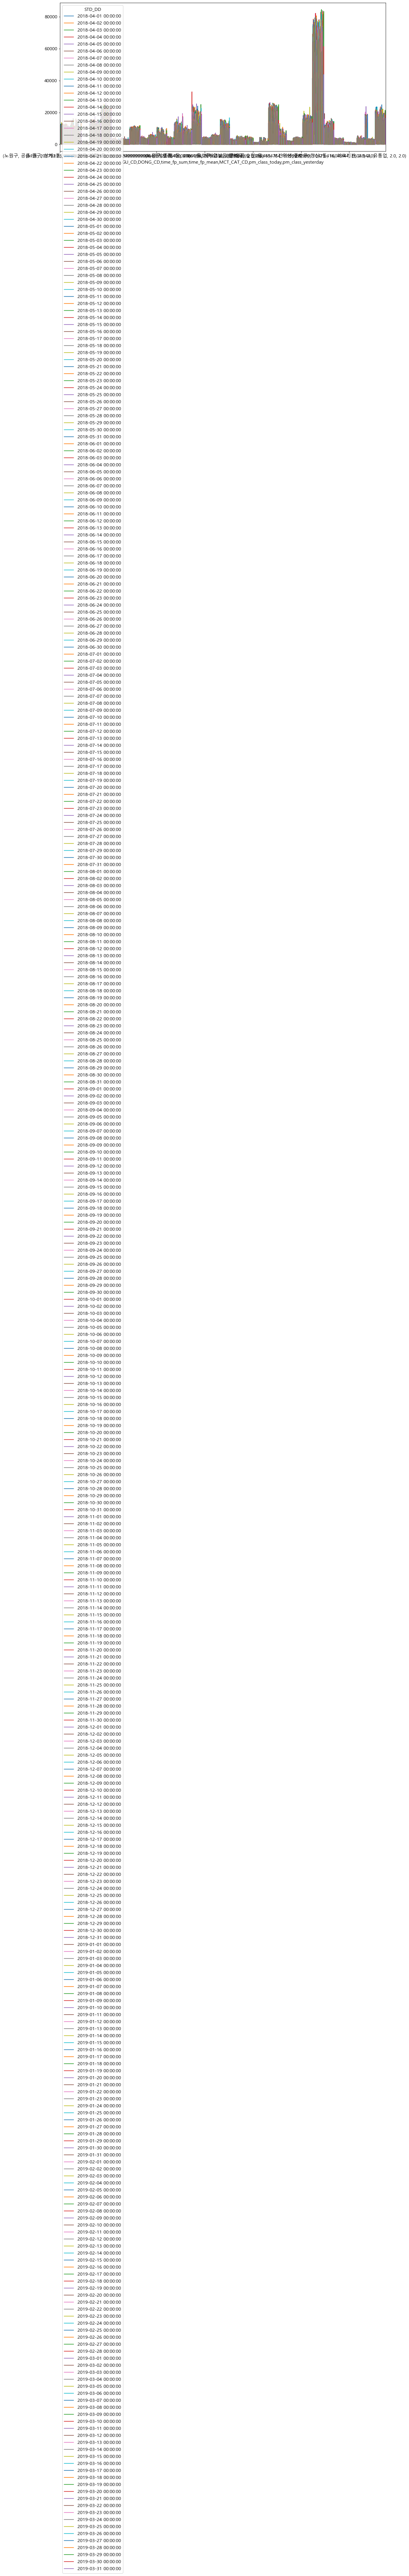

In [145]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
data.groupby(['GU_CD', 'DONG_CD', 'STD_DD','time_fp_sum', 'time_fp_mean' ,'MCT_CAT_CD','pm_class_today','pm_class_yesterday']).sum()['USE_CNT'].unstack(-6).plot(ax=ax)

In [259]:
# data.loc[data['DONG_CD'] == '청운효자동', 'time_fp_sum'] = floating_pop.loc[floating_pop['HDONG_NM']=='청운효자동']['time_fp_sum']

In [21]:
data.GU_CD.values

array(['노원구', '노원구', '노원구', ..., '종로구', '종로구', '종로구'], dtype=object)

In [278]:
data.to_pickle(path + 'card_dust_yudong.pkl')

load data.pkl

In [5]:
path = '../data/pkls/'
data = pd.read_pickle(path + 'card_dust_yudong.pkl')

### 유통데이터

In [4]:
path = '../data/pkls/'
yutong = pd.read_pickle( path + 'cat_cost.pickle')

In [10]:
yutong['date'] = pd.to_datetime(yutong['date'], format='%Y%m%d', errors='ignore')
yutong = yutong.set_index('date')

카드 소비 카테고리와 유통매출 카테고리을 통일시켜야함

없는 항목: 임신/육아, 홈&리빙  

음료식품: 마실거리, 간식, 식사  
서적문구: 사회활동  
가전, 레저용품 : 취미&여가활동  
보건위생 : 헬스&뷰티


In [18]:
yutong_ = yutong.copy()
yutong_ = yutong_.reset_index()
deleteCATE = ['임신/육아', '홈&리빙']
for i in deleteCATE:
    yutong_ = yutong_[yutong_.ANTC_ITEM_LCLS_NM != i]
    yutong_['MCT_CAT_CD'] = np.nan

https://stackoverflow.com/questions/36909977/update-row-values-where-certain-condition-is-met-in-pandas

In [25]:
yutong_.head()

,ADMD_NM,percentage,Total Cost,cat_cost,MCT_CAT_CD
date,,,,,
2018-04-01,가회동,21.0,759330,159459.30,음료식품
2018-04-01,가회동,41.3,759330,313603.29,음료식품
2018-04-01,가회동,2.1,759330,15945.93,서적문구
2018-04-01,가회동,23.8,759330,180720.54,음료식품
2018-04-01,가회동,1.0,759330,7593.30,레저용품


In [26]:
yutong_.columns = ['ADMD_NM', 'percentage', 'Total_Cost', 'Cat_Cost', 'MCT_CAT_CD']

In [27]:
yutong_.loc[yutong_['ANTC_ITEM_LCLS_NM'] == '간식', ['MCT_CAT_CD']] = '음료식품'
yutong_.loc[yutong_['ANTC_ITEM_LCLS_NM'] == '마실거리', ['MCT_CAT_CD']] = '음료식품'
yutong_.loc[yutong_['ANTC_ITEM_LCLS_NM'] == '식사', ['MCT_CAT_CD']] = '음료식품'

yutong_.loc[yutong_['ANTC_ITEM_LCLS_NM'] == '사회활동', ['MCT_CAT_CD']] = '서적문구'

yutong_.loc[yutong_['ANTC_ITEM_LCLS_NM'] == '취미&여가활동', ['MCT_CAT_CD']] = '레저용품'

yutong_.loc[yutong_['ANTC_ITEM_LCLS_NM'] == '헬스&뷰티', ['MCT_CAT_CD']] = '보건위생'
yutong_ = yutong_.set_index('date')
yutong_.head()

KeyError: 'ANTC_ITEM_LCLS_NM'

In [21]:
del yutong_['ANTC_ITEM_LCLS_NM']

In [22]:
catlist = ['음료식품', '서적문구', '레저용품', '보건위생']

In [30]:
yt_temp = pd.DataFrame()
yutong_ = yutong_.reset_index()
yt_temp['STD_DD'] = yutong_.date
yt_temp['DONG_CD'] = yutong_.ADMD_NM
yt_temp['MCT_CAT_CD'] = yutong_.MCT_CAT_CD
yt_temp['yt_total_amt'] = yutong_.Total_Cost
yt_temp['yt_cat_amt'] = yutong_.Cat_Cost
yt_temp.head()

,STD_DD,DONG_CD,MCT_CAT_CD,yt_total_amt,yt_cat_amt
0,2018-04-01,가회동,음료식품,759330,159459.30
1,2018-04-01,가회동,음료식품,759330,313603.29
2,2018-04-01,가회동,서적문구,759330,15945.93
3,2018-04-01,가회동,음료식품,759330,180720.54
4,2018-04-01,가회동,레저용품,759330,7593.30


In [48]:
temp = yt_temp.groupby(['STD_DD','DONG_CD', 'MCT_CAT_CD']).sum()

In [50]:
temp.new = yt_temp.groupby(['STD_DD','DONG_CD', 'MCT_CAT_CD'])['yt_cat_amt'].sum()

In [61]:
total_rp = pd.read_pickle(path + '유통RP')
total_rp.reset_index()

Total Cost
date ADMD_NM             
가회동  20180401      759330
     20180402      876662
     20180403     1006035
     20180404     1085985
     20180405      877143
     20180406      947154
     20180407      891725
     20180408     1133940
     20180409      871327
     20180410      883879
     20180411      984117
     20180412     1039120
     20180413     1042043
     20180414      882324
     20180415      867736
     20180416     1078397
     20180417      955219
     20180418      859394
     20180419      952573
     20180420     1073422
     20180421     1300523
     20180422      896212
     20180423      702872
     20180424      788470
     20180425     1058160
     20180426      926538
     20180427     1103134
     20180428     1079924
     20180429      965977
     20180430     1538940
...                   ...
혜화동  20190302     1095055
     20190303     1006646
     20190304     1002117
     20190305     1047724
     20190306      993175
     20190307     1011698
     20190308     1005659
     20190309     1119750
     20190310     1112670
     20190311     1027450
     20190312     1069354
     20190313     1056626
     20190314     1261703
     20190315     1160164
     20190316     1139803
     20190317     1002202
     20190318     1040689
     20190319     1096463
     20190320     1209372
     20190321     1113138
     20190322     1023299
     20190323     1187463
     20190324     1111502
     20190325     1054176
     20190326     1059211
     20190327     1058091
     20190328     1059645
     20190329     1062234
     20190330     1148066
     20190331     1019119

[13870 rows x 1 columns]

In [68]:
total_rp = total_rp.reset_index()

In [77]:
total_rp

,date,ADMD_NM,Total Cost
0,가회동,20180401,759330
1,가회동,20180402,876662
2,가회동,20180403,1006035
3,가회동,20180404,1085985
4,가회동,20180405,877143
5,가회동,20180406,947154
6,가회동,20180407,891725
7,가회동,20180408,1133940
8,가회동,20180409,871327
9,가회동,20180410,883879


In [69]:
temp = temp.reset_index()

In [85]:
temp.groupby
total_rp.groupby

AttributeError: 'DataFrame' object has no attribute 'roupby'

In [84]:
for row in temp.itertuples():
    

TypeError: 'method' object is not subscriptable

In [80]:
for i in temp.STD_DD.values:
    for z in temp.DONG_CD.values:
        temp.loc[(temp.STD_DD == i) & (temp.DONG_CD == z), 'yt_total_amt'] = total_rp.loc[(total_rp.ADMD_NM == i) & (total_rp.date == z), 'Total Cost']


KeyboardInterrupt: 

In [78]:
total_rp.loc[total_rp.date['가회동']]

KeyError: '가회동'

In [57]:
yt_temp.to_csv(path + 'yt_temp.csv')

In [107]:
yt_temp = yt_temp.set_index('index')
data = data.set_index('index')

In [120]:
row1idx = []
row2idx = []
for row1 in data.itertuples():
    for row2 in yt_temp.itertuples():
        if row1.DONG_CD == '하계2동' and row2.DONG_CD == '하계2동':
            if row1.MCT_CAT_CD == '음료식품' and row2.MCT_CAT_CD == '음료식품':
                row1idx.append(row1.Index)
                row2idx.append(row2.Index)
#                 data.iloc[row1.Index].yt_total_amt = row2.yt_total_amt
#                 data.iloc[row1.Index].yt_cat_amt = row2.yt_cat_amt
#         else:
#             data['yt_total_amt'] = np.nan
#             data['yt_cat_amt'] = np.nan


KeyboardInterrupt: 

In [ ]:
for row1 in data.itertuples():
    for row2 in yt_temp.itertuples():
        for i in donglist:
            for z in catlist:
                if row1.DONG_CD == str(i) and row2.DONG_CD == str(i):
                    if row1.MCT_CAT_CD == str(z) and row2.MCT_CAT_CD == str(z):
                        data.iloc[row1.Index].yt_total_amt = row2.yt_total_amt
                        data.iloc[row1.Index].yt_cat_amt = row2.yt_cat_amt
#         else:
#             data['yt_total_amt'] = np.nan
#             data['yt_cat_amt'] = np.nan

In [ ]:
data.loc[data['DONG_CD'] == '하계2동']

In [127]:
data.isna().sum()

STD_DD                   0
GU_CD                    0
DONG_CD                  0
SEX_CD                   0
AGE_CD                   0
MCT_CAT_CD               0
USE_CNT                  0
USE_AMT                  0
AMTperCNT                0
pm_class_today           0
pm_class_yesterday    2788
time_fp_sum              0
time_fp_mean             0
dtype: int64

for i in donglist:
    for z in catlist:
        if data.DONG_CD == str(i) and yt_temp.DONG_CD == str(i):
            if data.MCT_CAT_CD == str(z) and yt_temp.MCT_CAT_CD == str(z):
                data['yt_total_amt'] = yt_temp.yt_total_amt
                data['yt_cat_amt'] = yt_temp.yt_cat_amt

In [39]:
yt_temp = yt_temp.sort_index(axis=1)

if yt_temp['STD_DD'] == data['STD_DD'] and yt_temp['DONG_CD'] == data['DONG_CD'] and yt_temp['MCT_CAT_CD'] == data['MCT_CAT_CD']:
    data['yt_total_amt'] = yt_temp.yt_total_amt
    data['yt_cat_amt'] = yt_temp.yt_cat_amt

ValueError: Can only compare identically-labeled Series objects

In [22]:
def preprocess(x):
    df = pd.merge(data, x, on=['STD_DD','DONG_CD', 'MCT_CAT_CD'], how='left')
    df.to_csv("final.csv", mode="a", header=False, index=False)

reader = pd.read_csv(path + "yt_temp.csv", chunksize=1000)

for r in reader:
    preprocess(r) 

ValueError: You are trying to merge on datetime64[ns] and object columns. If you wish to proceed you should use pd.concat

In [61]:
yt_temp

,DONG_CD,MCT_CAT_CD,yt_total_amt,yt_cat_amt
STD_DD,,,,
2018-04-01,가회동,음료식품,759330,159459.300
2018-04-01,가회동,음료식품,759330,313603.290
2018-04-01,가회동,서적문구,759330,15945.930
2018-04-01,가회동,음료식품,759330,180720.540
2018-04-01,가회동,레저용품,759330,7593.300
2018-04-01,가회동,보건위생,759330,68339.700
2018-04-01,공릉1동,음료식품,759330,157181.310
2018-04-01,공릉1동,음료식품,759330,274877.460
2018-04-01,공릉1동,서적문구,759330,10630.620


In [174]:
data.to_pickle(path + 'finaldata.pkl')

In [3]:
path = '../data/pkls/'
data = pd.read_pickle(path + 'finaldata.pkl')

In [175]:
data.head()

,STD_DD,GU_CD,DONG_CD,SEX_CD,AGE_CD,MCT_CAT_CD,USE_CNT,USE_AMT,AMTperCNT,pm_class_today,pm_class_yesterday,time_fp_sum,time_fp_mean
0,2018-04-02,노원구,공릉1동,F,20,가전,4,112,28.000000,2.0,2.0,201793.73,20179.373
1,2018-04-03,노원구,공릉1동,F,20,가전,4,298,74.500000,2.0,2.0,205193.75,20519.375
2,2018-04-04,노원구,공릉1동,F,20,가전,4,88,22.000000,0.0,2.0,204093.71,20409.371
3,2018-04-07,노원구,공릉1동,F,20,가전,4,136,34.000000,1.0,3.0,203495.31,20349.531
4,2018-04-11,노원구,공릉1동,F,20,가전,9,258,28.666667,2.0,2.0,207404.85,20740.485
